In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (11).zip to archive (11).zip


In [ ]:
import zipfile
import os

archive_path = "archive (11).zip"  # use your actual uploaded file name

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall("fer_data")  # extracts to a folder named 'fer_data'

print(" Extraction complete!")


FileNotFoundError: [Errno 2] No such file or directory: 'archive (11).zip'

In [ ]:
!ls fer_data


test  train


In [ ]:
import tensorflow as tf
import os

# Define correct paths
train_dir = "fer_data/archive (11)/train"
test_dir = "fer_data/archive (11)/test"


In [ ]:
!ls fer_data


test  train


In [ ]:
train_dir = "fer_data/train"
test_dir  = "fer_data/test"


In [ ]:
import tensorflow as tf

img_size = (48, 48)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size
)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')  # Adjust if you have more/less classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,927 (3.43 MB)

 Trainable params: 897,031 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 338s 376ms/step - accuracy: 0.5397 - loss: 1.1775 - val_accuracy: 0.5302 - val_loss: 1.2548
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 338s 376ms/step - accuracy: 0.5734 - loss: 1.1260 - val_accuracy: 0.5148 - val_loss: 1.2956
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 335s 374ms/step - accuracy: 0.5919 - loss: 1.0603 - val_accuracy: 0.5323 - val_loss: 1.2455
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 384s 376ms/step - accuracy: 0.6121 - loss: 1.0034 - val_accuracy: 0.5522 - val_loss: 1.2376
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 384s 378ms/step - accuracy: 0.6372 - loss: 0.9494 - val_accuracy: 0.5549 - val_loss: 1.2471


In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"✅ Validation Accuracy: {accuracy:.2f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.5657 - loss: 1.2242
✅ Validation Accuracy: 0.56


In [ ]:
model.save("emotion_face_model.h5")
print("✅ Model saved!")


✅ Model saved!


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your image file


Saving images.jpeg to images.jpeg


📸 Please upload a face image (JPG or PNG)...


Saving images (1).jpg to images (1) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
🧠 Detected Emotion: Surprise


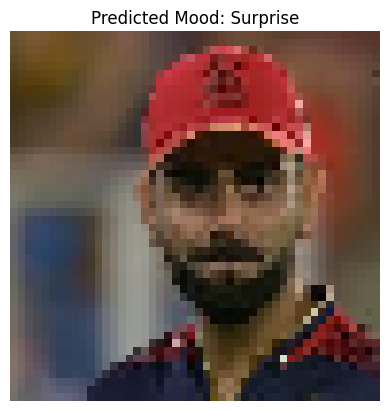

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your saved model
model = tf.keras.models.load_model("emotion_face_model.h5")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to take image input and predict
def detect_mood_from_image():
    print("📸 Please upload a face image (JPG or PNG)...")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        # Preprocess
        img = image.load_img(file_name, target_size=(48, 48))
        img_array = image.img_to_array(img)

        # If your model was trained on grayscale
        # img_array = tf.image.rgb_to_grayscale(img_array)

        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        predicted_label = tf.argmax(prediction[0]).numpy()
        emotion = emotion_labels[predicted_label]

        # Show result
        print(f"🧠 Detected Emotion: {emotion}")
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted Mood: {emotion}")
        plt.show()

# Call the function
detect_mood_from_image()


In [ ]:
# 💬 Emotion-to-suggestion mapping
emotion_suggestions = {
    "Angry": "😡 Try a quick walk to cool off 🚶",
    "Disgust": "😖 Step away and reset your mind 🧘",
    "Fear": "😨 Deep breaths help! You're safe here 💙",
    "Happy": "😊 Perfect time to take on focused tasks 💪",
    "Sad": "😔 Take a short break, listen to music 🎧",
    "Surprise": "😲 Channel that energy into something creative 🎨",
    "Neutral": "😐 Maintain the calm and keep going 🔄"
}


📸 Please upload a face image (JPG or PNG)...


Saving images.jpg to images (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

🧠 Detected Emotion: Sad
💡 Suggestion: 😔 Take a short break, listen to music 🎧



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


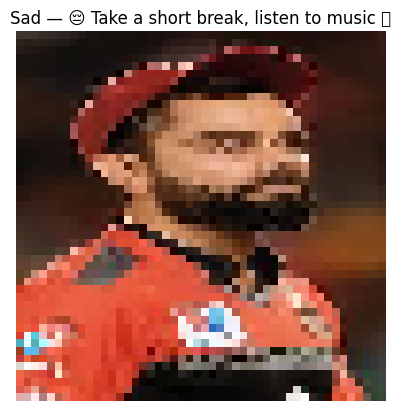

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 💬 Emotion-to-suggestion mapping
emotion_suggestions = {
    "Angry": "😡 Try a quick walk to cool off 🚶",
    "Disgust": "😖 Step away and reset your mind 🧘",
    "Fear": "😨 Deep breaths help! You're safe here 💙",
    "Happy": "😊 Perfect time to take on focused tasks 💪",
    "Sad": "😔 Take a short break, listen to music 🎧",
    "Surprise": "😲 Channel that energy into something creative 🎨",
    "Neutral": "😐 Maintain the calm and keep going 🔄"
}

# 🏗️ Load your trained facial emotion model
model = tf.keras.models.load_model("emotion_face_model.h5")

# 🎭 Emotion labels in correct order
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# 📸 Function to take input and predict mood
def detect_mood_from_image():
    print("📸 Please upload a face image (JPG or PNG)...")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        # Load and preprocess image
        img = image.load_img(file_name, target_size=(48, 48))
        img_array = image.img_to_array(img)

        # No grayscale — model trained on RGB
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict emotion
        prediction = model.predict(img_array)
        predicted_label = tf.argmax(prediction[0]).numpy()
        emotion = emotion_labels[predicted_label]

        # 🎯 Get suggestion based on detected emotion
        suggestion = emotion_suggestions.get(emotion, "🙂 Stay balanced and do your thing!")

        # 📊 Show result
        print(f"\n🧠 Detected Emotion: {emotion}")
        print(f"💡 Suggestion: {suggestion}\n")

        # 🖼️ Display image with title
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{emotion} — {suggestion}")
        plt.show()

# 🔁 Run it
detect_mood_from_image()


In [ ]:
# Save your trained facial emotion model
model.save("emotion_face_model.h5")

print("✅ Facial model saved!")


✅ Facial model saved!


In [ ]:
from google.colab import files
files.download("emotion_face_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>